In [1]:
import os, sys
sys.path.append(sys.path[0].split("lq_zprime")[0])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

import nbimporter
from Heatmap_Utilities.Main_Functions import smooth, plot_heatmap

In [ ]:
gU = 1.75

In [3]:
signals = ['non-res_tau_tau', 'zp_tau_tau']

In [4]:
XS = {}

for signal in signals:
    Path = os.path.join(os.path.dirname(os.getcwd()), "01_signal_production", 'xs_13TeV', 'woRHC', 'zp_upper_limit', signal, f'XS_matrix_{gU}.csv')
    
    XS[signal] = pd.read_csv(Path, index_col= 0)
    XS[signal].columns = [float(i) for i in XS[signal].columns]
    XS[signal].index = [float(i) for i in XS[signal].index]

In [5]:
XS[signal].index

Float64Index([   0.5, 0.5625,  0.625, 0.6875,   0.75, 0.8125,  0.875, 0.9375,
                 1.0, 1.0625,  1.125, 1.1875,   1.25, 1.3125,  1.375, 1.4375,
                 1.5, 1.5625,  1.625, 1.6875,   1.75, 1.8125,  1.875, 1.9375,
                 2.0, 2.0625,  2.125, 2.1875,   2.25, 2.3125,  2.375, 2.4375,
                 2.5, 2.5625,  2.625, 2.6875,   2.75, 2.8125,  2.875, 2.9375,
                 3.0, 3.0625,  3.125, 3.1875,   3.25, 3.3125,  3.375, 3.4375,
                 3.5],
             dtype='float64')

(0.5, 2.0)

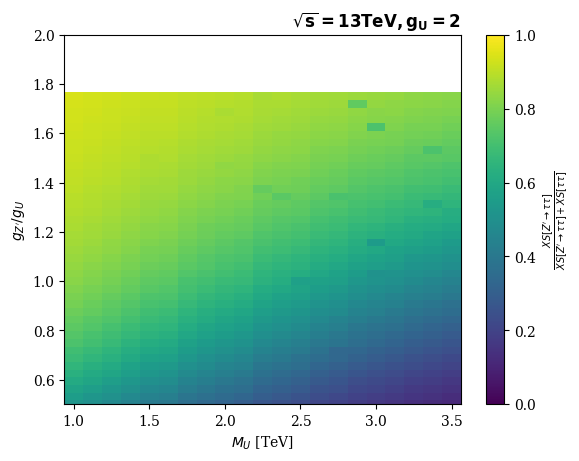

In [12]:

Heatmap_Dataframe = XS['zp_tau_tau'].copy()*0

for M in Heatmap_Dataframe.columns:
    for gZ in Heatmap_Dataframe.index:
        Heatmap_Dataframe[M][gZ] = XS['zp_tau_tau'][M][gZ] / (XS['zp_tau_tau'][M][gZ] + XS['ta_ta'][M][gZ])
        
Heatmap_Dataframe.index = [gZ/gU for gZ in Heatmap_Dataframe.index]
Heatmap_Dataframe.columns = [M/1000 for M in Heatmap_Dataframe.columns]

        
fig, ax, curves = plot_heatmap(Heatmap_Dataframe,
                               titulos = {'titulo':'', 'titulo_derecha': r'$\mathbf{\sqrt{s} = 13 TeV , g_{U} = ' + f'{gU}' + '}$','x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_{Z^{\prime}} / g_U$', 'cbar_label': r'$\frac{XS[Z^{\prime} \rightarrow \tau \tau]}{XS[Z^{\prime} \rightarrow \tau \tau] + XS[\tau \tau]}$'})

# plt.clim(0,1)
# plt.ylim(0.5,2)